In [1]:
import statsmodels
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os

import statsmodels.api as sm

$$
\newcommand{\cor}{\text{Cor}}
\newcommand{\var}{\text{Var}}
\newcommand{\cov}{\text{Cov}}
\newcommand{E}{\text{E}}
$$

Residuals is what remains to be explained after fitting the regression line. The regression model is $Y_i = \beta_0 + \beta_1 X_i + \epsilon_i$. We estimate the unknown parameters $\beta_0$ and $\beta_1$ as
$$
\begin{eqnarray}
\hat{\beta}_1 &=& \cor(Y, X)\frac{S_X}{S_Y} \\
\hat{\beta}_0 &=& \bar{Y} - \hat{\beta}_1\bar{X}
\end{eqnarray}
$$
We will examine the residuals in Galton's data. The fit in diamond data is quite impressive and may not help understand the idea and importance of residuals. The residuals are defined as 
$$
e_i = Y_i - \hat{Y}_i.
$$
An analysis of the residuals helps us understand why a model does not fit well.

In [5]:
filename = 'galton.csv'
pathname = os.path.join('.', 'datasets', filename)
if os.path.isfile(pathname):
    df: pd.core.frame.DataFrame = pd.read_csv(pathname)
else:
    assert False

In [6]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [7]:
model = sm.OLS(endog=df['child'], exog=sm.add_constant(df['parent']))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  child   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     246.8
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.73e-49
Time:                        16:58:32   Log-Likelihood:                -2063.6
No. Observations:                 928   AIC:                             4131.
Df Residuals:                     926   BIC:                             4141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9415      2.811      8.517      0.000      18.425      29.458
parent         0.6463      0.041     15.711      0.000       0.566       0.727
==============================================================================
Omnibus:                       11.057   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               10.944
Skew:                          -0.241   Prob(JB):                      0.00420
Kurtosis:                       2.775   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
Y_hat: np.array = result.predict()
residual: np.array = df['child'] - Y_hat

In [10]:
np.mean(residual)

np.float64(-1.0449878510402853e-13)

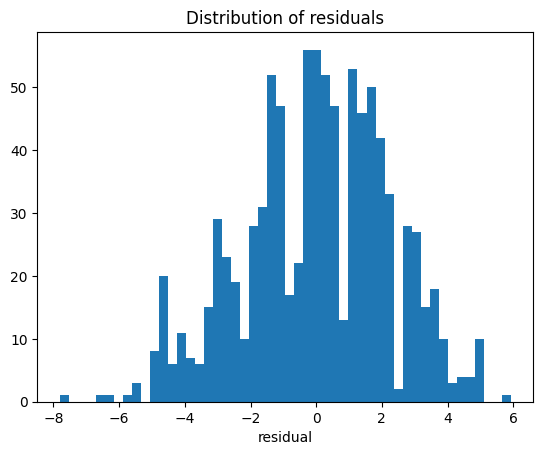

In [14]:
_ = plt.hist(residual, bins=50)
_ = plt.xlabel('residual')
_ = plt.title('Distribution of residuals')

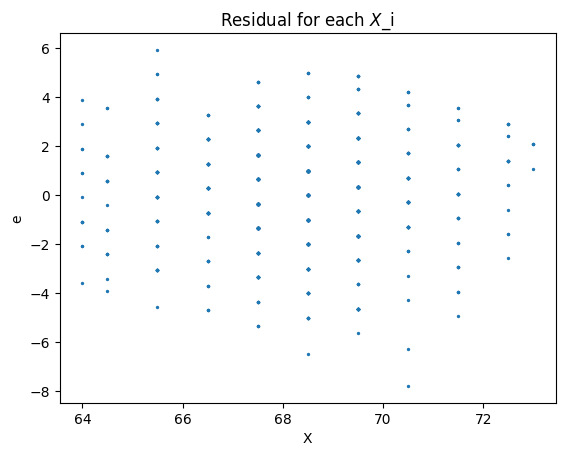

In [15]:
plt.scatter(df['parent'], residual, s=2)
plt.xlabel('X')
plt.ylabel('e')
_ = plt.title(r'Residual for each $X$_i')

A few observations:

- The spread in the residuals is not constant across the input. Therefore, the assumption that $\epsilon_i$ are iid $N(0, \sigma^2)$ is not valid.
- There also seems to be an oscillatory pattern to the residuals.

In the next cell, we will look at synthetic data designed to show oscillatory residuals when a linear model is fit.

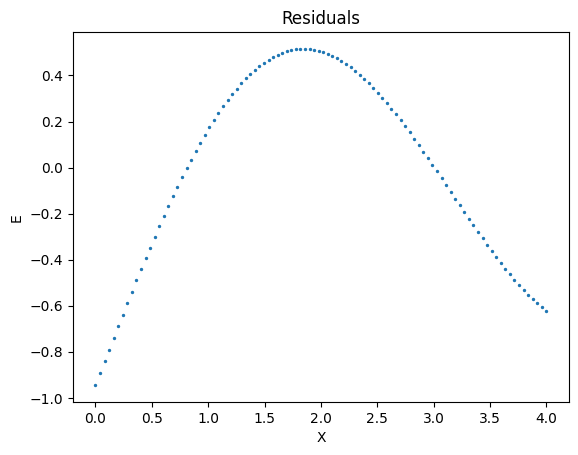

In [20]:
X = np.linspace(0, 4, 100)
Y = 0.5 * X + np.sin(X)
model_1 = sm.OLS(Y, sm.add_constant(X))
result_1 = model_1.fit()
_ = plt.scatter(X, result_1.resid, s=2)
_ = plt.xlabel('X')
_ = plt.ylabel('E')
_ = plt.title('Residuals')

In the next synthetic data set, we will deliberately add random noise that does not remain constant.

In [23]:
n_samples = 100
X = np.linspace(0, 4, n_samples)
Y = 0.5 * X + np.sqrt(X) * np.random.normal(0, 1, n_samples)

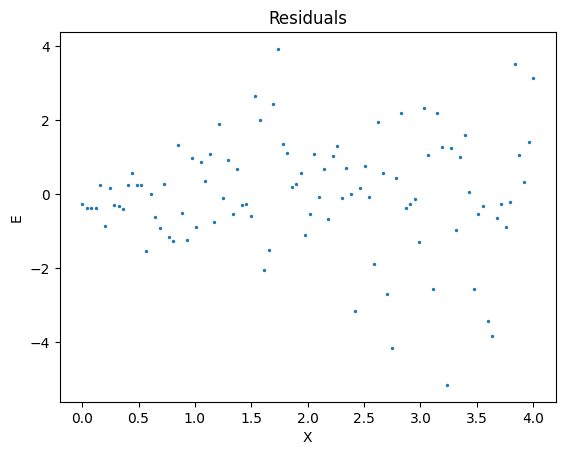

In [24]:
model_2 = sm.OLS(Y, sm.add_constant(X))
result_2 = model_2.fit()
_ = plt.scatter(X, result_2.resid, s=2)
_ = plt.xlabel('X')
_ = plt.ylabel('E')
_ = plt.title('Residuals')

The residuals show a blatant violation of the assumption of uniform variance. The violation is called _heteroscedasticity_ while the adherence is called _homoscedasticity_.

MSE or residuals is 
$$
\frac{1}{N-2}\sum_{i=1}^N (e_i - \bar{e})^2 = \frac{1}{N-2}\sum_{i=1}^N e_i^2,
$$
as $\bar{e} = 0$ for a model with intercept. We confirm that using the code in the next two cells. This is called 'variance of residuals'. It differs slightly from the $\var\;E$, which we compute separately.

In [25]:
result_2.mse_resid

np.float64(2.3898143592105066)

In [33]:
np.sum(result_2.resid**2)/(n_samples - 2)

np.float64(2.3898143592105066)

In [27]:
np.var(result_2.resid)

np.float64(2.3420180720262964)